<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Spring2024/blob/main/Module%201/6_DYI_Symbolic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial notebook for the Spring 2024 Course on mathematic methods.
- Instructor Sergei V. Kalinin, sergei2@utk.edu

# Genetic Algorithms

This example is taken from Chapter 6 of
https://livebook.manning.com/book/deep-reinforcement-learning-in-action/chapter-2/79

In [9]:
import random
import numpy as np
from matplotlib import pyplot as plt

alphabet = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ,.! " #A
target = "Hello World!" #B

class Individual: #C
    def __init__(self, string, fitness=0):
        self.string = string
        self.fitness = fitness

from difflib import SequenceMatcher

def similar(a, b): #D
    return SequenceMatcher(None, a, b).ratio()

def spawn_population(length=14,size=100): #E
    pop = []
    for i in range(size):
        string = ''.join(random.choices(alphabet,k=length))
        individual = Individual(string)
        pop.append(individual)
    return pop

#A This is the list of characters we sample from to produce random strings
#B This is the string we’re trying to evolve from a random population
#C We set up a simple class to store information about each member of the population
#D This method will compute a similarity metric between two strings, giving us a fitness score
#E This method will produce an initial random population of strings

In [10]:
pop_init = spawn_population()
for i,val in enumerate(pop_init):
  if i%10 ==0:
    print(val.string)

qovrt TsPkvIeg
WtGuJmeGrSMTiT
ZdQQA LdRGUwce
xOhYLMGCnAsjtq
aqKCunKsJxQooQ
agWJlh!lTfnD,Q
,iVN.GtmXZjuIP
WGrjeZZ OP hrZ
  O.SYsMnpvTsT
.bjQD,gwyrvTdM


In [11]:
def recombine(p1_, p2_): #A
    p1 = p1_.string
    p2 = p2_.string
    child1 = []
    child2 = []
    cross_pt = random.randint(0,len(p1))
    child1.extend(p1[0:cross_pt])
    child1.extend(p2[cross_pt:])
    child2.extend(p2[0:cross_pt])
    child2.extend(p1[cross_pt:])
    c1 = Individual(''.join(child1))
    c2 = Individual(''.join(child2))
    return c1, c2

def mutate(x, mut_rate=0.01): #B
    new_x_ = []
    for char in x.string:
        if random.random() < mut_rate:
            new_x_.extend(random.choices(alphabet,k=1))
        else:
            new_x_.append(char)
    new_x = Individual(''.join(new_x_))
    return new_x

#A This function recombines two parent strings into two new offspring
#B This function will mutate a string by randomly flipping characters

In [12]:
def evaluate_population(pop, target): #A
    avg_fit = 0
    for i in range(len(pop)):
        fit = similar(pop[i].string, target)
        pop[i].fitness = fit
        avg_fit += fit
    avg_fit /= len(pop)
    return pop, avg_fit

def next_generation(pop, size=100, length=14, mut_rate=0.01): #B
    new_pop = []
    while len(new_pop) < size:
        parents = random.choices(pop,k=2, weights=[x.fitness for x in pop])
        offspring_ = recombine(parents[0],parents[1])
        child1 = mutate(offspring_[0], mut_rate=mut_rate)
        child2 = mutate(offspring_[1], mut_rate=mut_rate)
        offspring = [child1, child2]
        new_pop.extend(offspring)
    return new_pop

#A This function assigns a fitness score to each individual in the population
#B This function generates a new generation by recombination and mutation

In [72]:
num_generations = 100
population_size = 1000
str_len = len(target)
mutation_rate = 0.001 #A

pop_fit = []
pop = spawn_population(size=population_size, length=str_len) #B
done = False

for gen in range(num_generations):
    pop, avg_fit = evaluate_population(pop, target)
    pop_fit.append(avg_fit) #C
    new_pop = next_generation(pop, size=population_size, length=str_len, mut_rate=mutation_rate)
    pop = new_pop
    for x in pop:
        if x.string == target:
            print("Target Found!")
            done = True
    if done:
        break
#A Set the mutation rate to 0.1%
#B Create the initial random population
#C Record population average fitness over training time

In [73]:
pop.sort(key=lambda x: x.fitness, reverse=True) #sort in place, highest fitness first
print(f"{pop[0].string}\n{pop[1].string}\n{pop[2].string}")

HellgoloWrld
Helllo  Wold
Hell o  Wrd!


In [74]:
for x in pop:
  print(x.string)

HellgoloWrld
Helllo  Wold
Hell o  Wrd!
Hell olcWor!
Helloo oWol!
Hell o  Wrr!
Hell,o  Wol!
Helloo  aol!
Helloo  Wol!
Hell o oWol!
Hell,ol Wold
Hell o oWol!
Helllo YWod!
Helleo  Wold
Hell oL,Wol!
Helleo  yod!
Hell,ol Wol!
Hell o  Wrdl
Helleo ,Wor!
Hell,o  Wold
Hlllool Wold
HellCo ,Wrl!
HellTo YWol!
Hell,o  Wrl!
Hell o  Wll!
Helleo  Wod!
Helloo ,Word
Helleo ,Word
HelleoWcWod!
Hell ol Wold
Hell,oW Wrl!
Hell o cWor!
Helloo ,Sod!
Hell,oWPWlr!
Helloo ,Word
HellToI Wor!
Hell o lWol!
HellCo ,Wod!
Hell oW Wrld
Hell,oI WrlT
Hell o oWod!
Hell,o ,Wrl!
Hell oW Wol!
Helleo ,Wol!
Hell,o lWold
Hell ol Wol!
Hell oW Wol!
Hell,o oWrl!
HellCo oWod!
Heloeo oWold
Kell,oX,Wold
HellCo  Wold
Hell oL Wol!
Hell,o oWor!
HelN o oWol!
Helloo YWol!
Hellgo ,Wrd!
Hell o  Wold
Helleo oWod!
Hellgo oWou!
Hell o  Wold
Helloo  Wold
Hell o  Wod!
HellZo oTor!
HelNlo oWod!
HellCo  Wol!
HellCo cWol!
Hellgo oWol!
Heloeo oWol!
Hell,ol Wol!
Hell o  Wol!
Hellgo  Word
HellTe oWol!
Hell o cWol!
Helloo  Wold
Helleo  Wrr!
HellCo  Wod!

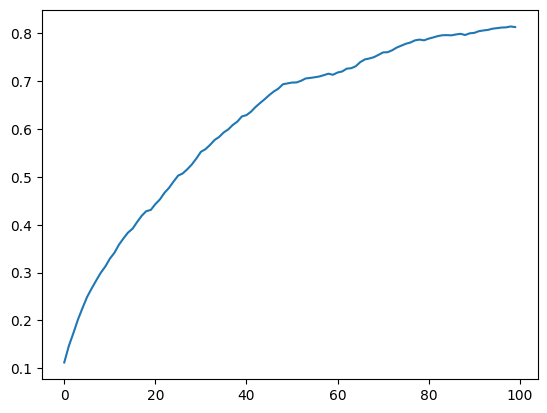

In [75]:
plt.plot(pop_fit)

# DYI Symbolic Regression

## NumPy version

In [26]:
import random
import operator
import numpy as np
import matplotlib.pyplot as plt

# Define basic operations
ops = {
    '+': operator.add,
    '-': operator.sub,
    '*': operator.mul,
    '/': lambda x, y: x / y if y != 0 else 1,  # Avoid division by zero
}

# Generate random expression
def generate_expression(max_depth, variables, constants):
    if max_depth == 1 or random.random() < 0.5:
        # Choose either a variable or a constant
        if random.random() < 0.5:
            return random.choice(variables)
        else:
            return str(random.choice(constants))
    else:
        op = random.choice(list(ops.keys()))
        return f"({generate_expression(max_depth-1, variables, constants)} {op} {generate_expression(max_depth-1, variables, constants)})"

# Evaluate expression
def evaluate_expression(expression, variable_values):
    try:
        return eval(expression, {}, variable_values)
    except ZeroDivisionError:
        return float('inf')

# Fitness function
def fitness(expression, variable_values, target_values):
    diffs = 0
    for v, t in zip(variable_values, target_values):
        val = evaluate_expression(expression, {'x': v})
        diffs += (val - t) ** 2
    return diffs

# Create initial population
def create_population(size, max_depth, variables, constants):
    return [generate_expression(max_depth, variables, constants) for _ in range(size)]

# Simple genetic algorithm
def genetic_algorithm(population, variable_values, target_values, generations=10):
    for generation in range(generations):
        # Evaluate fitness
        scored_population = [(fitness(expr, variable_values, target_values), expr) for expr in population]
        scored_population.sort()
        best_score, best_expr = scored_population[0]

        # Print best solution of this generation
        print(f"Generation {generation}, Best Score: {best_score}, Expr: {best_expr}")

        # Selection - top 50%
        selected = [expr for _, expr in scored_population[:len(scored_population)//2]]

        # Crossover and mutation
        new_population = selected
        while len(new_population) < len(population):
            if random.random() < 0.1:  # mutation
                new_population.append(generate_expression(max_depth, variables, constants))
            else:  # crossover
                new_population.append(random.choice(selected))

        population = new_population

    return best_expr

# Example usage
variables = ['x']
constants = [i for i in range(10)]  # Numeric constants from 0 to 9
max_depth = 5
pop_size = 100
generations = 10

# Create a simple dataset (y = x^2)
x_values = np.linspace(-10, 10, 100)
y_values = x_values ** 3 + x_values - 3

# Run the genetic algorithm
population = create_population(pop_size, max_depth, variables, constants)
best_solution = genetic_algorithm(population, x_values, y_values, generations)
print("Best solution:", best_solution)


<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encounte

Generation 0, Best Score: 2903379.2417725017, Expr: (7 * (4 * ((x - 0) + (2 + x))))
Generation 1, Best Score: 2903379.2417725017, Expr: (7 * (4 * ((x - 0) + (2 + x))))
Generation 2, Best Score: 2903379.2417725017, Expr: (7 * (4 * ((x - 0) + (2 + x))))
Generation 3, Best Score: 2903379.2417725017, Expr: (7 * (4 * ((x - 0) + (2 + x))))
Generation 4, Best Score: 2903379.2417725017, Expr: (7 * (4 * ((x - 0) + (2 + x))))
Generation 5, Best Score: 2903379.2417725017, Expr: (7 * (4 * ((x - 0) + (2 + x))))
Generation 6, Best Score: 2903379.2417725017, Expr: (7 * (4 * ((x - 0) + (2 + x))))
Generation 7, Best Score: 2903379.2417725017, Expr: (7 * (4 * ((x - 0) + (2 + x))))
Generation 8, Best Score: 2903379.2417725017, Expr: (7 * (4 * ((x - 0) + (2 + x))))
Generation 9, Best Score: 2903379.2417725017, Expr: (7 * (4 * ((x - 0) + (2 + x))))
Best solution: (7 * (4 * ((x - 0) + (2 + x))))


In [27]:
generations

10

## SymPy version

In [28]:
!pip install sympy

In [77]:
import random
import numpy as np
import sympy as sp
from sympy.abc import x  # Using x as the symbolic variable

# Generate random expression
def generate_expression(max_depth, variables):
    if max_depth == 1 or random.random() < 0.5:
        if random.random() < 0.5:  # Half chance to return a variable, half to return a constant
            return random.choice(variables)
        else:
            return sp.Rational(np.random.randint(0, 10))  # Random constant between 0 and 9 as a rational number
    else:
        op = random.choice([sp.Add, sp.Mul])
        return op(generate_expression(max_depth-1, variables), generate_expression(max_depth-1, variables))

# Evaluate expression
def evaluate_expression(expression, x_values):
    f = sp.lambdify(x, expression, 'numpy')
    try:
        return f(x_values)
    except (ValueError, FloatingPointError):
        return np.full_like(x_values, float('inf'))  # Return infinities if evaluation fails

# Fitness function
def fitness(expression, x_values, y_values):
    y_pred = evaluate_expression(expression, x_values)
    return np.sum((y_values - y_pred) ** 2)

# Create initial population
def create_population(size, max_depth, variables):
    return [generate_expression(max_depth, variables) for _ in range(size)]

# Simple genetic algorithm
def genetic_algorithm(population, x_values, y_values, generations=10):
    for generation in range(generations):
        # Evaluate fitness
        scored_population = [(fitness(expr, x_values, y_values), expr) for expr in population]
        scored_population.sort(key=lambda x: x[0])  # Sort by fitness score
        best_score, best_expr = scored_population[0]

        # Print best solution of this generation
        print(f"Generation {generation}, Best Score: {best_score}, Expr: {best_expr}")

        # Selection - top 50%
        selected = [expr for _, expr in scored_population[:len(scored_population)//2]]

        # Crossover and mutation
        new_population = selected
        while len(new_population) < len(population):
            if random.random() < 0.1:  # mutation
                new_population.append(generate_expression(max_depth, variables))
            else:  # crossover
                new_population.append(random.choice(selected))

        population = new_population

    return best_expr

# Example usage
variables = [x]  # List of variables to be used in expressions
max_depth = 25
pop_size = 100
generations = 300

# Create a simple dataset (y = x^2)
x_values = np.linspace(-20, 10, 100)
y_values = x_values ** 3 + 2 * x_values **2 - 3 * x_values + 2

# Run the genetic algorithm
population = create_population(pop_size, max_depth, variables)
best_solution = genetic_algorithm(population, x_values, y_values, generations)

# Simplify the best solution
simplified_solution = sp.simplify(best_solution)
print("Best simplified solution:", simplified_solution)


Generation 0, Best Score: 305886514.49504536, Expr: 96*x + 576
Generation 1, Best Score: 305886514.49504536, Expr: 96*x + 576
Generation 2, Best Score: 305886514.49504536, Expr: 96*x + 576
Generation 3, Best Score: 305886514.49504536, Expr: 96*x + 576
Generation 4, Best Score: 305886514.49504536, Expr: 96*x + 576
Generation 5, Best Score: 305886514.49504536, Expr: 96*x + 576
Generation 6, Best Score: 305886514.49504536, Expr: 96*x + 576
Generation 7, Best Score: 305886514.49504536, Expr: 96*x + 576
Generation 8, Best Score: 305886514.49504536, Expr: 96*x + 576
Generation 9, Best Score: 305886514.49504536, Expr: 96*x + 576
Generation 10, Best Score: 305886514.49504536, Expr: 96*x + 576
Generation 11, Best Score: 10761884.737178948, Expr: x**3
Generation 12, Best Score: 10761884.737178948, Expr: x**3
Generation 13, Best Score: 10761884.737178948, Expr: x**3
Generation 14, Best Score: 10761884.737178948, Expr: x**3
Generation 15, Best Score: 10761884.737178948, Expr: x**3
Generation 16, B

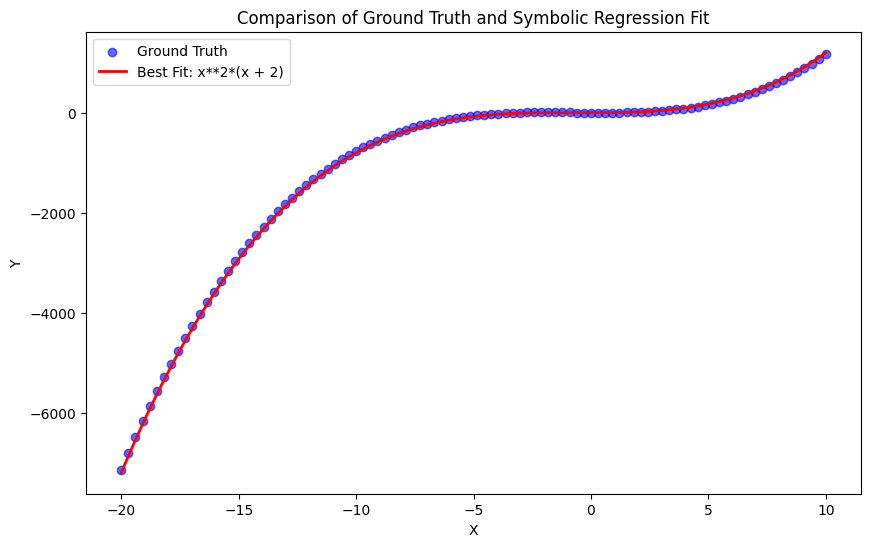

In [78]:
# Using the best solution obtained from the previous genetic algorithm
# to compare the ground truth with the fit

# Evaluate the best solution
best_solution_evaluated = evaluate_expression(simplified_solution, x_values)

# Visualization
plt.figure(figsize=(10, 6))

# Plot the ground truth data
plt.scatter(x_values, y_values, color='blue', label='Ground Truth', alpha=0.6)

# Plot the fit from the best solution
plt.plot(x_values, best_solution_evaluated, color='red', label=f'Best Fit: {simplified_solution}', linewidth=2)

plt.title('Comparison of Ground Truth and Symbolic Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
